                                   Medical  Insurance Charges Prediction

In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

DATA INSPECTION

Loaded dataset

In [56]:
df = pd.read_csv('medical_insurance_enhanced_dataset.csv')
df

,age,sex,bmi,children,smoker,region,exercise_level,diet_type,alcohol_consumption,chronic_disease,annual_income,insurance_plan,charges
0,56,male,33.4,0,no,west,high,poor,none,no,838655,basic,11755
1,46,male,22.5,3,no,north,medium,average,high,no,1299627,premium,10339
2,32,male,29.0,2,no,east,low,poor,moderate,yes,313197,basic,20310
3,60,female,39.8,4,no,north,low,average,moderate,yes,766957,standard,32348
4,25,female,36.5,3,no,east,medium,poor,high,no,827143,basic,15034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,48,female,19.9,4,no,west,high,poor,none,yes,357622,premium,19030
14996,26,female,37.3,0,yes,south,medium,poor,moderate,no,266459,basic,30740
14997,37,male,33.0,3,no,north,low,average,none,yes,1451346,premium,18683
14998,27,female,16.7,3,no,north,medium,poor,moderate,no,884190,basic,9797


In [57]:
df.head()

,age,sex,bmi,children,smoker,region,exercise_level,diet_type,alcohol_consumption,chronic_disease,annual_income,insurance_plan,charges
0,56,male,33.4,0,no,west,high,poor,none,no,838655,basic,11755
1,46,male,22.5,3,no,north,medium,average,high,no,1299627,premium,10339
2,32,male,29.0,2,no,east,low,poor,moderate,yes,313197,basic,20310
3,60,female,39.8,4,no,north,low,average,moderate,yes,766957,standard,32348
4,25,female,36.5,3,no,east,medium,poor,high,no,827143,basic,15034


In [58]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'exercise_level',
       'diet_type', 'alcohol_consumption', 'chronic_disease', 'annual_income',
       'insurance_plan', 'charges'],
      dtype='object')

In [59]:
df.describe()

,age,bmi,children,annual_income,charges
count,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,40.979267,28.055207,1.997400,8.502290e+05,19942.200600
std,13.478937,6.934922,1.412961,3.739263e+05,9765.035448
min,18.000000,16.000000,0.000000,2.000210e+05,123.000000
25%,30.000000,22.100000,1.000000,5.281628e+05,12305.750000
50%,41.000000,28.100000,2.000000,8.513210e+05,17085.000000
75%,53.000000,34.100000,3.000000,1.176577e+06,26804.750000
max,64.000000,40.000000,4.000000,1.499972e+06,56956.000000


In [60]:
df.dtypes

age                      int64
sex                     object
bmi                    float64
children                 int64
smoker                  object
region                  object
exercise_level          object
diet_type               object
alcohol_consumption     object
chronic_disease         object
annual_income            int64
insurance_plan          object
charges                  int64
dtype: object

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  int64  
 1   sex                  15000 non-null  object 
 2   bmi                  15000 non-null  float64
 3   children             15000 non-null  int64  
 4   smoker               15000 non-null  object 
 5   region               15000 non-null  object 
 6   exercise_level       15000 non-null  object 
 7   diet_type            15000 non-null  object 
 8   alcohol_consumption  15000 non-null  object 
 9   chronic_disease      15000 non-null  object 
 10  annual_income        15000 non-null  int64  
 11  insurance_plan       15000 non-null  object 
 12  charges              15000 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 1.5+ MB


In [62]:
for i in df.columns:
    print(df[i].unique())
    print("*"*100)
    print(df[i].value_counts())
    print("*"*100)

[56 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 44 59 45
 33 64 54 24 26 35 21 31 43 37 52 34 23 51 27 48 62 58 18 22 30 49 63]
****************************************************************************************************
age
43    365
34    364
30    363
40    350
64    345
33    341
62    340
45    339
46    338
54    333
39    331
35    329
61    329
56    328
36    328
41    327
25    327
59    327
38    326
50    324
19    323
29    322
32    322
21    321
42    320
52    319
20    317
49    315
23    312
53    312
37    309
26    309
27    309
31    308
57    304
55    304
18    301
22    300
51    299
28    296
58    295
47    294
60    292
24    292
48    286
44    283
63    282
Name: count, dtype: int64
****************************************************************************************************
['male' 'female']
****************************************************************************************************
sex
female    7598
male      7402
N

Data cleaning

In [63]:
df.isna().sum()

age                    0
sex                    0
bmi                    0
children               0
smoker                 0
region                 0
exercise_level         0
diet_type              0
alcohol_consumption    0
chronic_disease        0
annual_income          0
insurance_plan         0
charges                0
dtype: int64

In [64]:
df.isna().sum()/len(df)*100

age                    0.0
sex                    0.0
bmi                    0.0
children               0.0
smoker                 0.0
region                 0.0
exercise_level         0.0
diet_type              0.0
alcohol_consumption    0.0
chronic_disease        0.0
annual_income          0.0
insurance_plan         0.0
charges                0.0
dtype: float64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  int64  
 1   sex                  15000 non-null  object 
 2   bmi                  15000 non-null  float64
 3   children             15000 non-null  int64  
 4   smoker               15000 non-null  object 
 5   region               15000 non-null  object 
 6   exercise_level       15000 non-null  object 
 7   diet_type            15000 non-null  object 
 8   alcohol_consumption  15000 non-null  object 
 9   chronic_disease      15000 non-null  object 
 10  annual_income        15000 non-null  int64  
 11  insurance_plan       15000 non-null  object 
 12  charges              15000 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 1.5+ MB


In [66]:
cols = ['sex', 'smoker', 'region', 'exercise_level', 'diet_type', 'alcohol_consumption', 'chronic_disease', 'insurance_plan']

for i in cols:
    print(df[i].unique(), i)
    print('*'*43)

['male' 'female'] sex
*******************************************
['no' 'yes'] smoker
*******************************************
['west' 'north' 'east' 'south'] region
*******************************************
['high' 'medium' 'low'] exercise_level
*******************************************
['poor' 'average' 'good'] diet_type
*******************************************
['none' 'high' 'moderate'] alcohol_consumption
*******************************************
['no' 'yes'] chronic_disease
*******************************************
['basic' 'premium' 'standard'] insurance_plan
*******************************************


VISUALIZATION

PIE CHART OF SEX,SMOKER,REGION - helps understand class baance and data composition

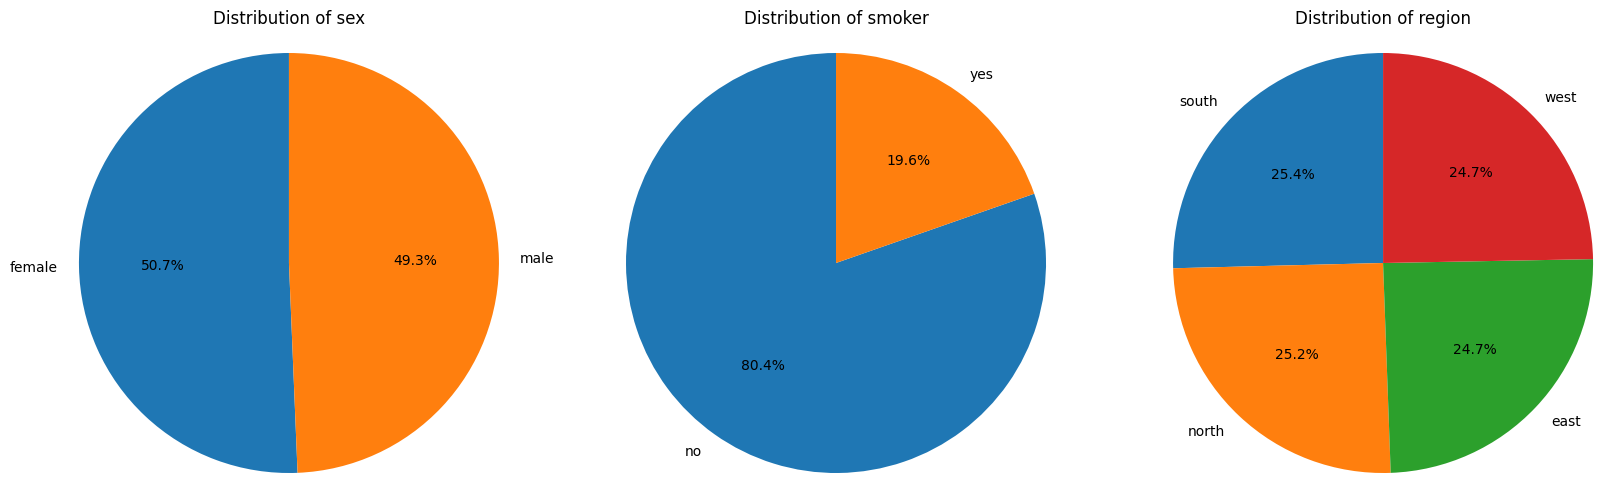

In [67]:
import matplotlib.pyplot as plt

features = ['sex', 'smoker', 'region']

plt.figure(figsize=(20, 6))

for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    
    x = df[col].value_counts()
    
    plt.pie(
        x.values,
        labels=x.index,
        autopct='%1.1f%%',
        startangle=90
    )
    
    plt.title(f'Distribution of {col}')
    plt.axis('equal')   # Makes pie circular

plt.show()

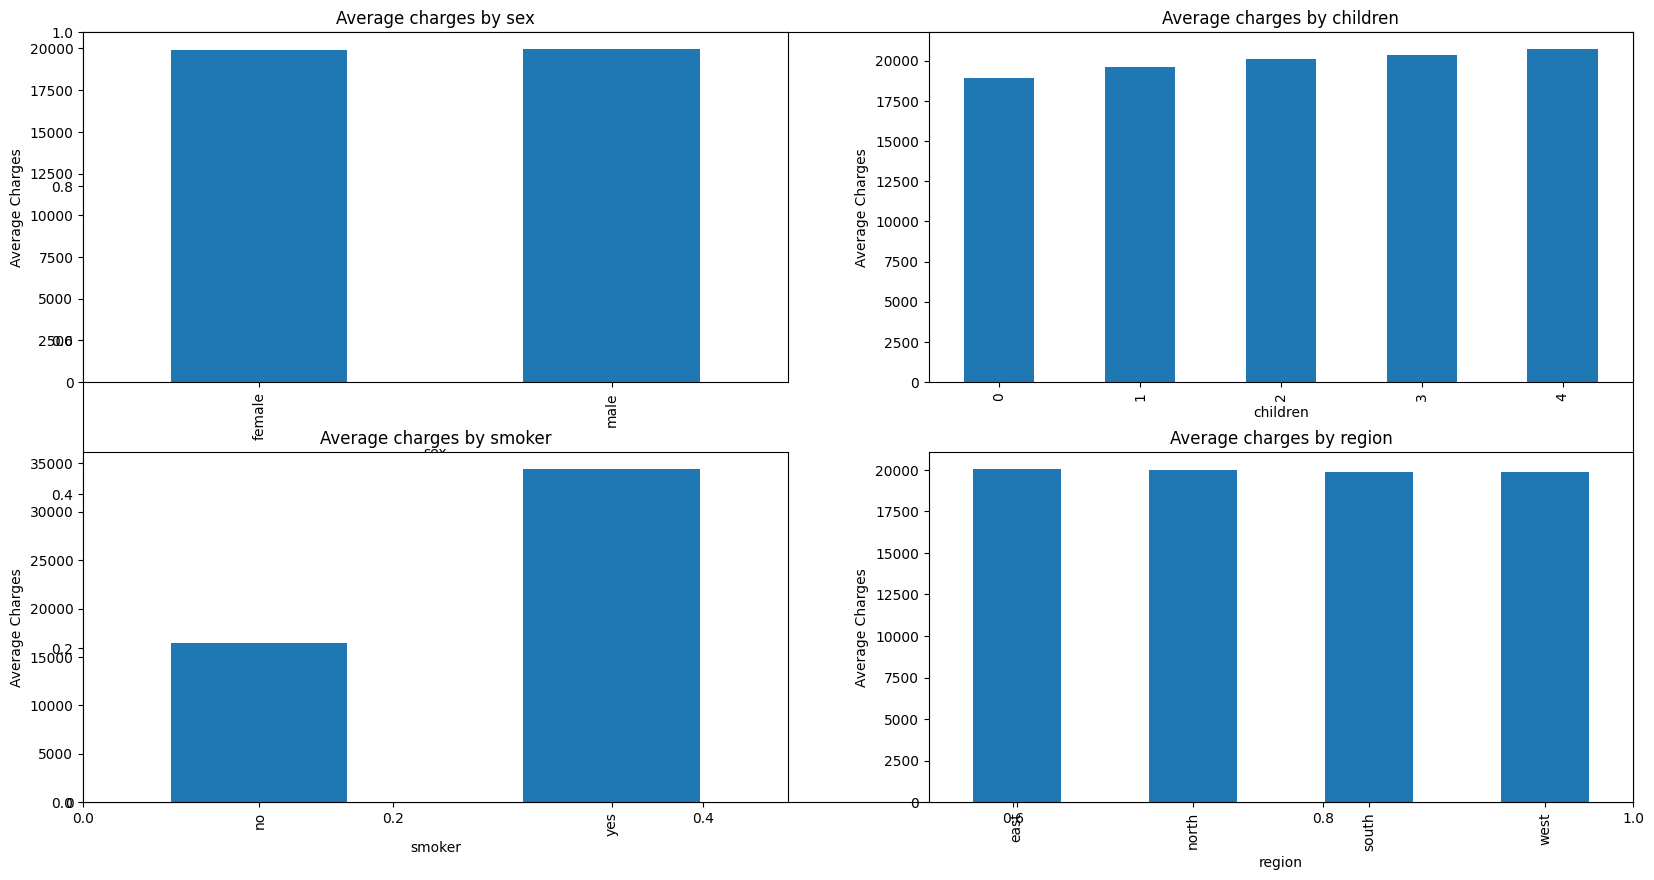

In [68]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
    plt.title(f'Average charges by {col}')
    plt.ylabel('Average Charges')
    
    
plt.show()

Observations:
- Charges are on the higher side for males as compared to females but the difference is not that much.
- Premium charged from the smoker is around thrice that which is charged from non-smokers.
- Charges are approximately the same in the given four regions.

scatterplot - +ve rlnship b/w age,BMI,and medical insurance charges,
with smokers exhibiting higher costs across all ranges

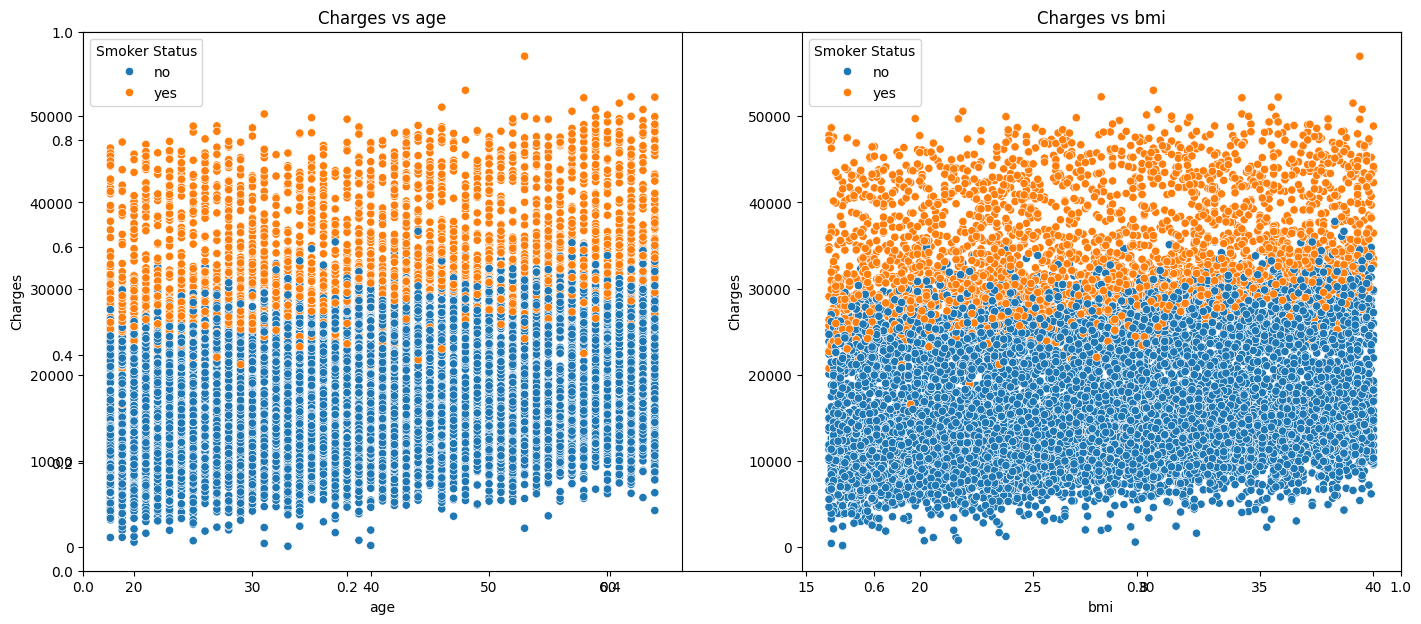

In [69]:
import seaborn as sns

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
    plt.title(f'Charges vs {col}')
    plt.ylabel('Charges')
    plt.xlabel(col)
    plt.legend(title='Smoker Status')

plt.show()

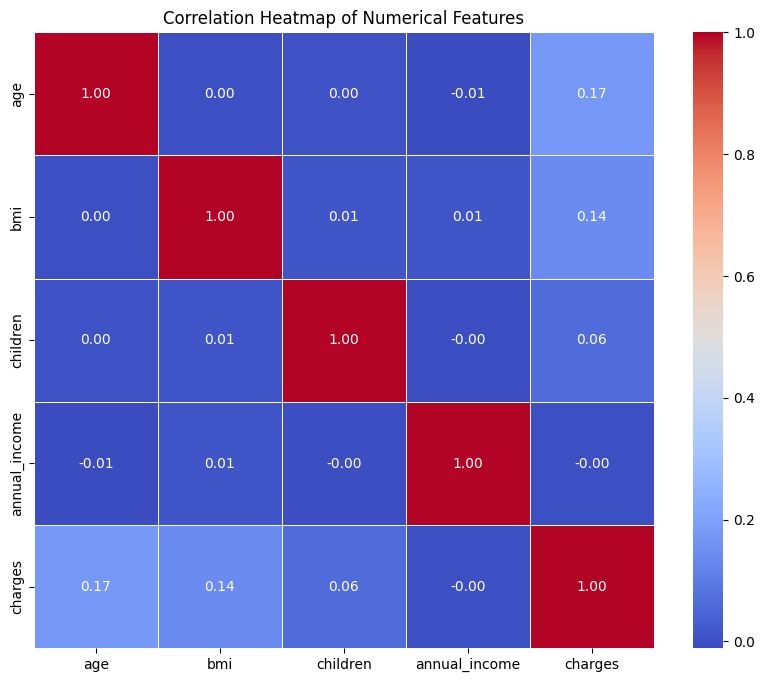

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()


The correlation heatmap shows that charges have a strong positive correlation with smoking status and age, while BMI shows a moderate correlation. This insight supports the selection of these features for predictive modeling.
# correlation heatmap - visualizes linear relationships 
# highlights age and bmi as positively coorelated

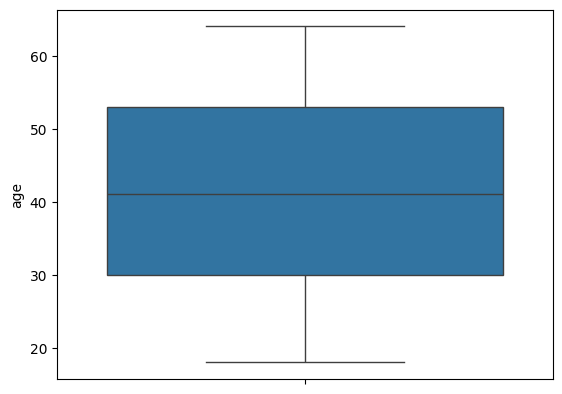

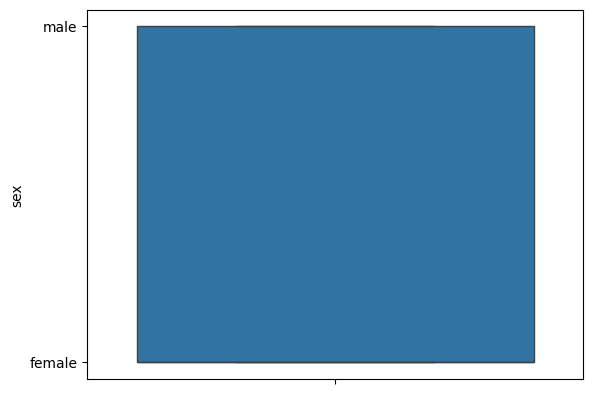

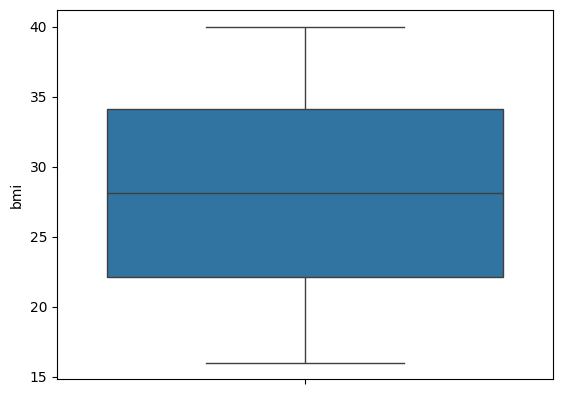

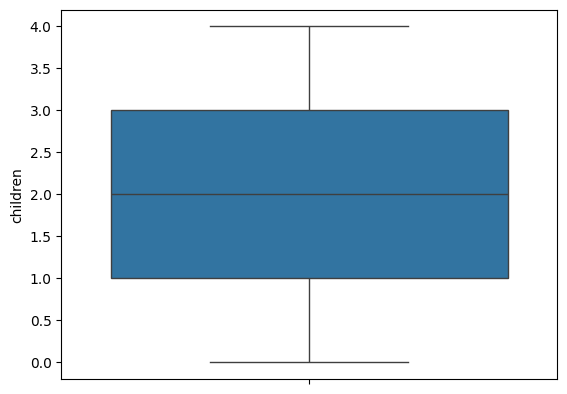

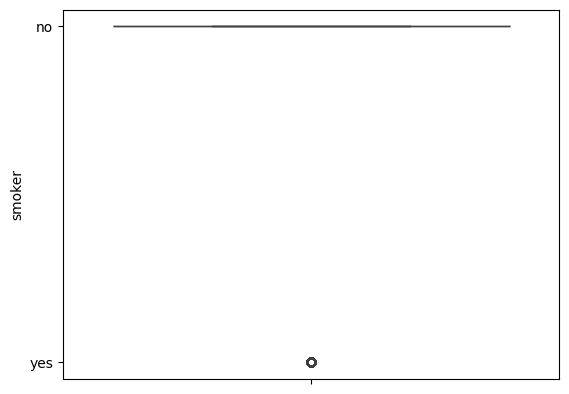

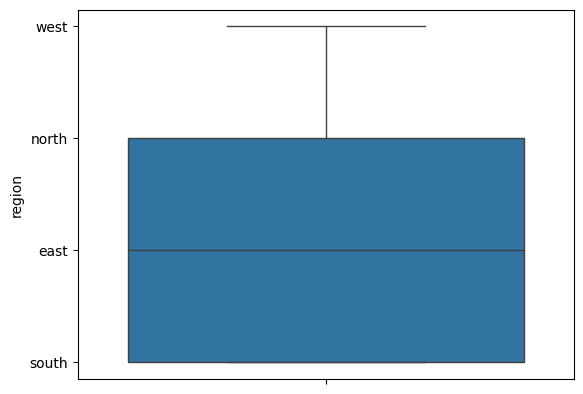

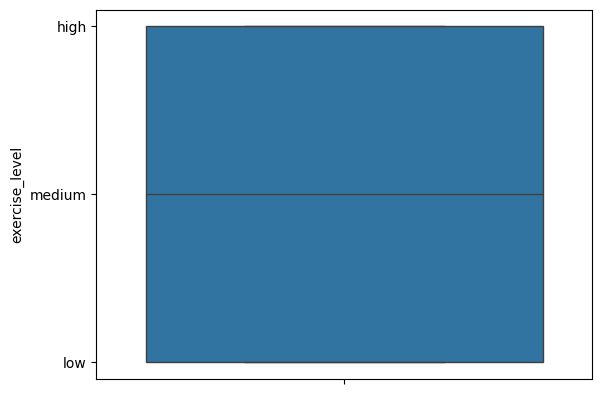

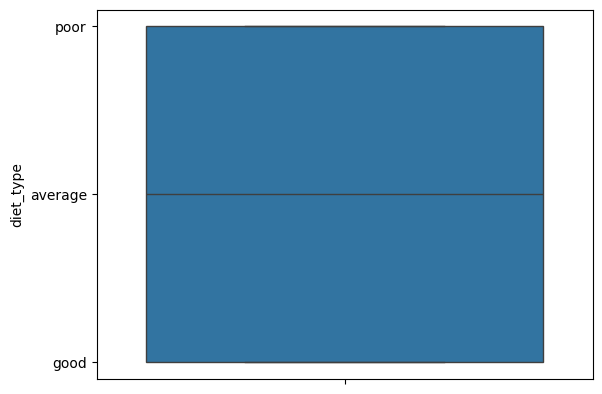

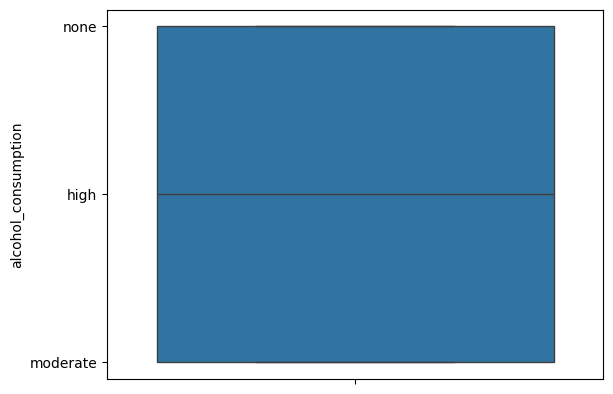

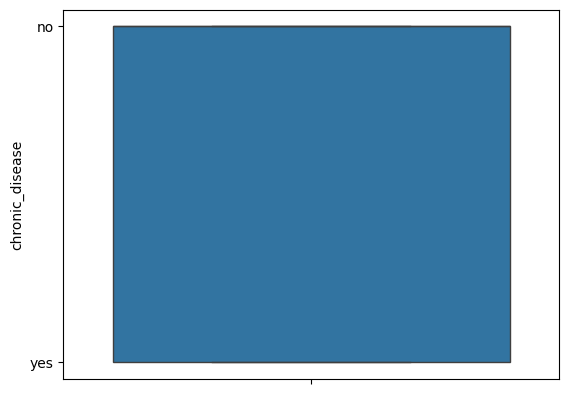

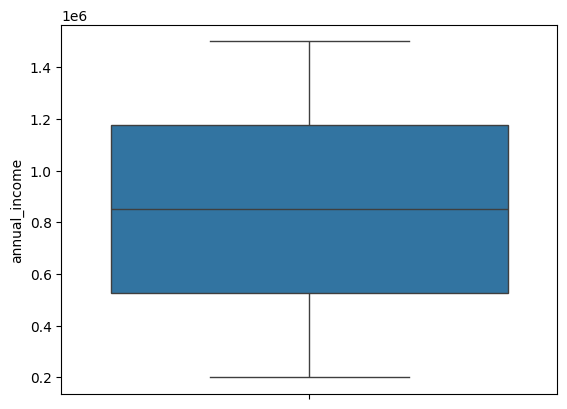

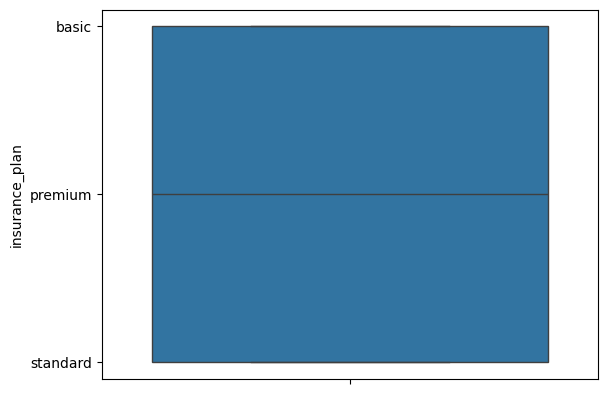

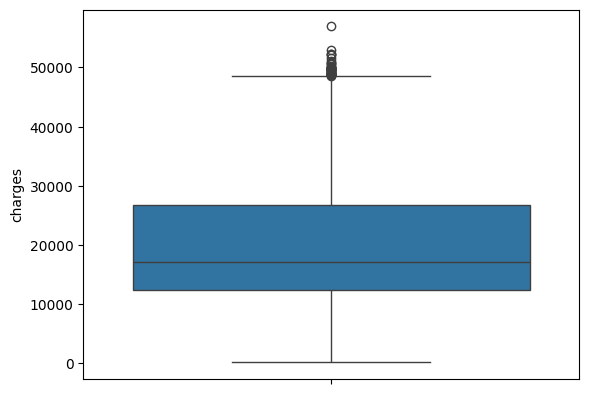

In [71]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [72]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['age', 'bmi', 'children', 'annual_income', 'charges'], dtype='object')

In [73]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


In [74]:
for col in num_cols:
    df = remove_outliers_iqr(df, col)

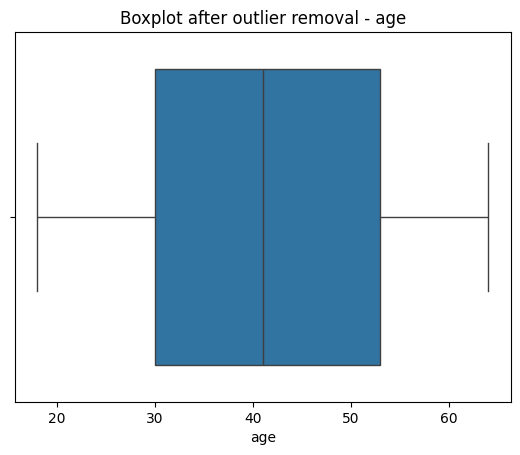

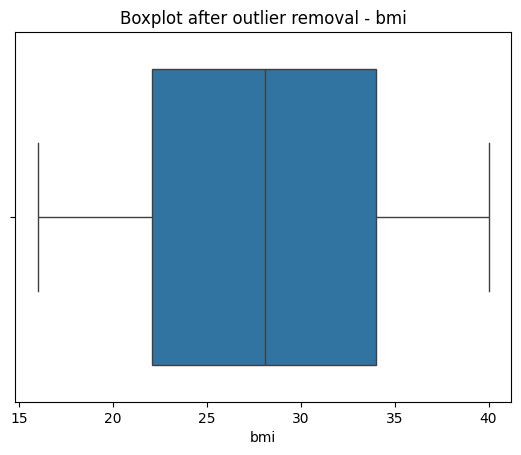

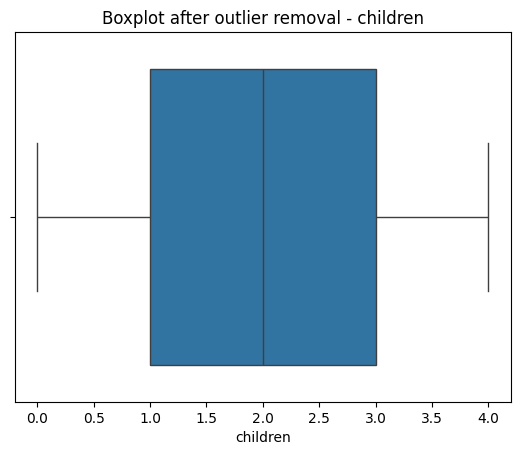

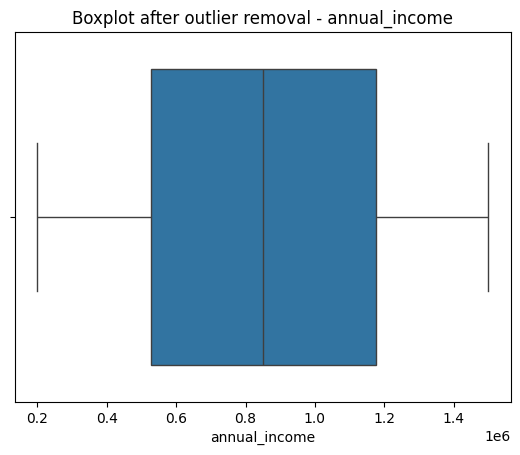

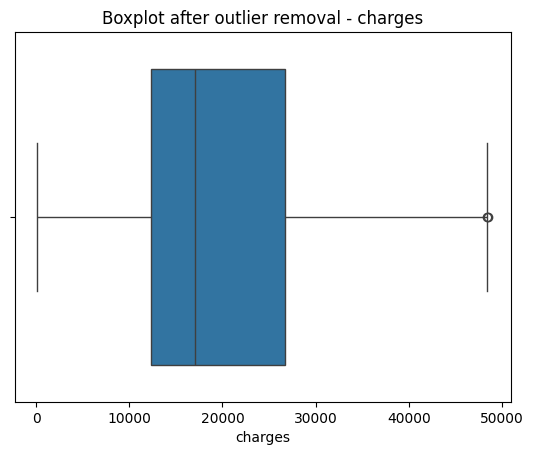

In [75]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot after outlier removal - {col}")
    plt.show()

In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
df.dtypes

age                      int64
sex                     object
bmi                    float64
children                 int64
smoker                  object
region                  object
exercise_level          object
diet_type               object
alcohol_consumption     object
chronic_disease         object
annual_income            int64
insurance_plan          object
charges                  int64
dtype: object

In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
le = LabelEncoder()

# Columns for Label Encoding (binary / ordinal)
label_cols = [
    'sex',
    'smoker',
    'chronic_disease',
    'alcohol_consumption',
    'exercise_level'
]

# Apply Label Encoding
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [79]:
# One-Hot Encoding for nominal categorical columns
df = pd.get_dummies(
    df,
    columns=['region', 'diet_type', 'insurance_plan'],
    drop_first=True
)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [80]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14958 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      14958 non-null  int64  
 1   sex                      14958 non-null  int64  
 2   bmi                      14958 non-null  float64
 3   children                 14958 non-null  int64  
 4   smoker                   14958 non-null  int64  
 5   exercise_level           14958 non-null  int64  
 6   alcohol_consumption      14958 non-null  int64  
 7   chronic_disease          14958 non-null  int64  
 8   annual_income            14958 non-null  int64  
 9   charges                  14958 non-null  int64  
 10  region_north             14958 non-null  int64  
 11  region_south             14958 non-null  int64  
 12  region_west              14958 non-null  int64  
 13  diet_type_good           14958 non-null  int64  
 14  diet_type_poor           14

In [81]:
df.value_counts()

age  sex  bmi   children  smoker  exercise_level  alcohol_consumption  chronic_disease  annual_income  charges  region_north  region_south  region_west  diet_type_good  diet_type_poor  insurance_plan_premium  insurance_plan_standard
18   0    16.3  2         0       1               1                    1                390437         21630    1             0             0            0               1               0                       1                          1
          16.4  3         0       1               2                    1                1249931        25169    1             0             0            0               1               0                       0                          1
          16.6  4         0       2               0                    0                900020         7556     0             1             0            0               0               1                       0                          1
          16.8  1         1       1               0  

In [82]:
df.corr()

,age,sex,bmi,children,smoker,exercise_level,alcohol_consumption,chronic_disease,annual_income,charges,region_north,region_south,region_west,diet_type_good,diet_type_poor,insurance_plan_premium,insurance_plan_standard
age,1.000000,0.010655,-0.001275,0.002229,0.002038,-0.001974,-0.004841,-0.002254,-0.010800,0.167147,-0.014441,-0.004009,0.009269,0.014201,-0.006315,-0.003724,0.005662
sex,0.010655,1.000000,0.005544,-0.003589,-0.006505,-0.001834,0.005671,0.011969,-0.007620,0.005264,-0.007497,0.000430,0.010139,-0.008776,0.006856,0.003111,-0.008993
bmi,-0.001275,0.005544,1.000000,0.008333,0.000506,0.001217,-0.007405,0.019887,0.009548,0.138811,0.007203,-0.017049,-0.006180,-0.004777,0.005944,0.001583,0.002463
children,0.002229,-0.003589,0.008333,1.000000,-0.008013,-0.005653,-0.010227,-0.000323,-0.004525,0.059088,0.002057,-0.001083,-0.001699,0.000046,0.005650,0.007860,0.003563
smoker,0.002038,-0.006505,0.000506,-0.008013,1.000000,0.015105,-0.000291,-0.007364,-0.001873,0.730750,0.008412,-0.006824,-0.005270,0.007888,-0.000761,-0.011834,0.007224
exercise_level,-0.001974,-0.001834,0.001217,-0.005653,0.015105,1.000000,0.004025,0.004162,-0.000487,0.013547,-0.000371,-0.002814,-0.002114,-0.007656,0.016590,-0.004743,0.002799
alcohol_consumption,-0.004841,0.005671,-0.007405,-0.010227,-0.000291,0.004025,1.000000,0.012556,-0.012634,0.006435,-0.004575,0.008932,-0.001542,0.005007,0.003657,0.014803,-0.016611
chronic_disease,-0.002254,0.011969,0.019887,-0.000323,-0.007364,0.004162,0.012556,1.000000,0.007869,0.562728,-0.009564,0.007952,-0.006966,-0.004321,-0.001816,0.005811,0.009337
annual_income,-0.010800,-0.007620,0.009548,-0.004525,-0.001873,-0.000487,-0.012634,0.007869,1.000000,-0.002072,0.009294,0.001822,-0.001860,-0.013155,-0.001445,-0.004122,-0.000380
charges,0.167147,0.005264,0.138811,0.059088,0.730750,0.013547,0.006435,0.562728,-0.002072,1.000000,0.001357,-0.003967,-0.006335,0.000840,0.001409,-0.005881,0.013915


FEATURE SCALING

Splitting features and target

In [83]:
X = df.drop('charges', axis=1)
y = df['charges']


In [84]:
#split data into training set and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [86]:
import numpy as np

print(np.mean(X_train_scaled, axis=0))
print(np.std(X_train_scaled, axis=0))


[-1.27073496e-16 -3.97846927e-17 -4.09722955e-16 -5.93801384e-18
 -1.30636304e-17 -7.12561660e-17 -7.89755840e-17  5.28483232e-17
 -1.00946235e-16  1.49637949e-16 -1.00946235e-17  1.33605311e-17
  3.20652747e-17 -7.12561660e-17  5.34421245e-17  8.07569882e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Model Building

In [87]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("\nKNN Regressor")
print("R2 Score:", r2_score(y_test, y_pred_knn))
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))



KNN Regressor
R2 Score: 0.8625657183665858
MAE: 2751.1174560733384
RMSE: 3494.4459883092527


In [88]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

dt.fit(X_train, y_train)   # ❗ Tree does NOT need scaling
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Regressor")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))



Decision Tree Regressor
R2 Score: 0.8914668824948779
MAE: 2471.572343177436
RMSE: 3105.3598441400945


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression
R2 Score: 0.9023177708989305
MAE: 2338.2268974475196
RMSE: 2946.0395621632783


In [90]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

print("\nRidge Regression")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))



Ridge Regression
R2 Score: 0.902318891877514
MAE: 2338.223382290917
RMSE: 2946.022658081747


In [91]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

print("\nLasso Regression")
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))



Lasso Regression
R2 Score: 0.9023179110607483
MAE: 2338.2252587312446
RMSE: 2946.0374485628204


Model Comparison Table

In [92]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso', 'KNN', 'Decision Tree'],
    'R2': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_knn),
        r2_score(y_test, y_pred_dt)
    ]
})

print(results)


           Model        R2
0         Linear  0.902318
1          Ridge  0.902319
2          Lasso  0.902318
3            KNN  0.862566
4  Decision Tree  0.891467


In [93]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Ridge Regression',
        'Lasso Regression',
        'KNN Regressor',
        'Decision Tree Regressor'
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_knn),
        r2_score(y_test, y_pred_dt)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_knn),
        mean_absolute_error(y_test, y_pred_dt)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_knn)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt))
    ]
})

print(results)


                     Model  R2 Score          MAE         RMSE
0        Linear Regression  0.902318  2338.226897  2946.039562
1         Ridge Regression  0.902319  2338.223382  2946.022658
2         Lasso Regression  0.902318  2338.225259  2946.037449
3            KNN Regressor  0.862566  2751.117456  3494.445988
4  Decision Tree Regressor  0.891467  2471.572343  3105.359844


In [94]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# ---------------- Models ----------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=7),
    "Decision Tree": DecisionTreeRegressor(
        max_depth=5,
        min_samples_split=10,
        random_state=42
    )
}

results = []

# ---------------- Training & Evaluation ----------------
for name, model in models.items():
    
    # Scaling only where required
    if name == "Decision Tree":
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # ---------------- Fit Classification ----------------
    if train_r2 - test_r2 > 0.10:
        fit_status = "Overfit"
    elif train_r2 < 0.60 and test_r2 < 0.60:
        fit_status = "Underfit"
    else:
        fit_status = "Good Fit"

    results.append([name, train_r2, test_r2, fit_status])

# ---------------- Results Table ----------------
fit_df = pd.DataFrame(
    results,
    columns=["Model", "Train R2", "Test R2", "Fit Status"]
)

print(fit_df)


               Model  Train R2   Test R2 Fit Status
0  Linear Regression  0.905517  0.902318   Good Fit
1   Ridge Regression  0.905517  0.902319   Good Fit
2   Lasso Regression  0.905517  0.902318   Good Fit
3      KNN Regressor  0.900304  0.862566   Good Fit
4      Decision Tree  0.897872  0.891467   Good Fit


In [95]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform




ridge = Ridge()

param_dist = {
    'alpha': uniform(0.001, 100)   # random values between 0.001 and 100
}




In [96]:
random_search = RandomizedSearchCV(
    ridge,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42
)

random_search.fit(X_train_scaled, y_train)


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Ridge()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.",{'alpha': <scipy.stats....002366B9A81A0>}
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls

In [97]:
print("Best Alpha:", random_search.best_params_)
print("Best CV R2 Score:", random_search.best_score_)


Best Alpha: {'alpha': np.float64(4.646041271999773)}
Best CV R2 Score: 0.905094197034758


In [98]:
best_ridge = random_search.best_estimator_
best_ridge.fit(X_train_scaled, y_train)


,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",np.float64(4.646041271999773)
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic

In [99]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = best_ridge.predict(X_test_scaled)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.902322867967241
MAE: 2338.213016515
RMSE: 2945.9626988436994


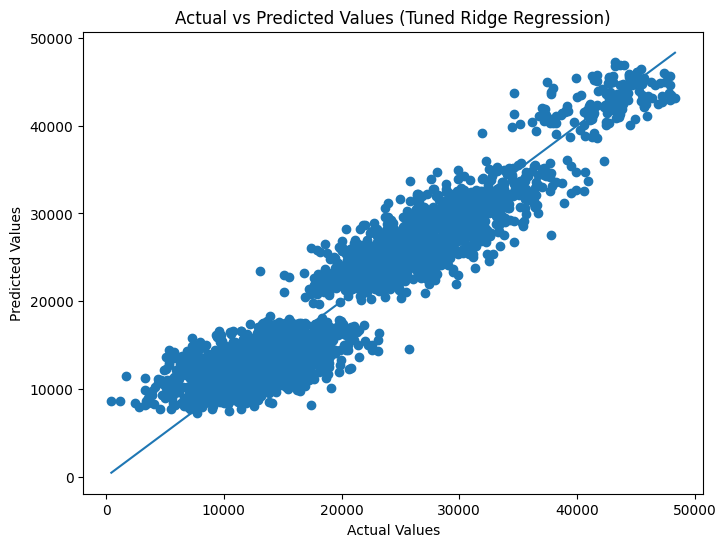

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6)) 
plt.scatter(y_test, y_pred) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()]) 
plt.xlabel("Actual Values") 
plt.ylabel("Predicted Values") 
plt.title("Actual vs Predicted Values (Tuned Ridge Regression)") 
plt.show()

The Actual vs Predicted plot shows that the tuned Ridge Regression model performs well, as most predicted values closely follow the ideal diagonal line, indicating good accuracy and low prediction error.

In [101]:
import pickle

In [102]:
with open("model.sav", "wb") as f:
    pickle.dump(best_ridge, f)

with open("scaler.sav", "wb") as f:
    pickle.dump(scaler, f)

with open("label1.sav", "wb") as f:
    pickle.dump(le, f)


In [103]:
import os

print(os.path.getsize("model.sav"))
print(os.path.getsize("scaler.sav"))
print(os.path.getsize("label1.sav"))


578
1127
265
